# CDC Diabetes Health Indicators

## CONTEXT

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching 400 billion dollars annually.

Dataset link: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## CONTENT

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984.

For this project, I have used to BRFSS 2015 dataset containing 253680 responses (instances) answering questions relating to each responder's 21 different lifestyle choices, healthcare amenities available, and health-related risks and patterns (features). 

## PROBLEM STATEMENT

Using the BRFSS 2015 dataset, I will perform extensive data cleaning and pre-processing techniques to ensure credibility and consistency of the acquired data. Following that, I will implement all Classification Models and conduct model evaluation techniques to find the most competant model. Once I have successfully completed this task, I will move on to cross validation techniques such as Hyperparameter tuning to further improve the acquired dataset. Finally, I will implement the test set to recheck and re-evaluate the best-performing model.

### About Columns:

**Diabetes_binary** : you have diabetes (0 = no diabetes | 1 = prediabetes or diabetes)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0 = no high BP | 1 = high BP)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0 = no high cholesterol | 1 = high cholesterol)

**CholCheck** : Cholesterol check within past five years (0 = no cholesterol check in 5 years | 1 = yes cholesterol check in 5 years)

**BMI** : Body Mass Index

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0 = no | 1 = yes)

**Stroke** : (Ever been told) you had a stroke. (0 = no | 1 = yes)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0 = no | 1 = yes)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0 = no | 1 = yes)

**Fruits** : Consume Fruit 1 or more times per day (0 = no | 1 = yes)

**Veggies** : Consume Vegetables 1 or more times per day (0 = no | 1 = yes)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0 = no | 1 = yes)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0 = no | 1 = yes)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0 = no | 1 = yes)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5) (1 = excellent | 2 = very good | 3 = good | 4 = fair | 5 = poor)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0 = no | 1 = yes)

**Sex** : Indicate sex of respondent (0,1) (0 = female | 1 = male)

**Age** : Fourteen-level age category (1 ~ 14) (1 = 18-24 | 2 = 25-29 | 3 = 30-34 | 4 = 35-39 | 5 = 40-44 | 6 = 45-49 | 7 = 50-54 | 8 = 55-59 | 9 = 60-64 | 10 = 65-69 | 11 = 70-74 | 12 = 75-79 | 13 = 80 and older)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6) (1 = Never attended school or only kindergarten | 2 = Grades 1 through 8 (Elementary) | 3 = Grades 9 through 11 (Some high school) | 4 = Grade 12 or GED (High school graduate) | 5 = College 1 year to 3 years (Some college or technical school) | 6 = College 4 years or more (College graduate))

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8) (1 = <10000 | 2 = <15000 | 3 = <20000 | 4 = <25000 | 5 = <35000 | 6 = <50000 | 7 = <75000 | 8 = 75000 and more)

## DATA EXPLORATION

**Importing Libraries**

In [2]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

**Loading Dataset**

In [3]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
print("\t")
print("CDC Diabetes Health Indicator")
print("\t")
data

	
CDC Diabetes Health Indicator
	


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


**Understand the Data Structure**

In [6]:
# Check the number of rows and columns
print("\t")
print(f"The shape of the dataset is {data.shape}")

	
The shape of the dataset is (253680, 22)


In [8]:
# Display column names
print("\t")
print("Column names are:")
print("\t")
data.columns

	
Column names are:
	


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
# Check data types
print("\t")
print("Each column's data types are:")
print("\t")
data.dtypes

	
Each column's data types are:
	


Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [12]:
# Get concise information about the dataset
print("\t")
print("Dataset Information:")
print("\t")
data.info()

	
Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               25368

In [14]:
# Summary statistics
print("\t")
print("Summary Statistics:")
print("\t")
data.describe()

	
Summary Statistics:
	


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [16]:
# Checking unique values in categorical columns
print("\t")
print("Unique Values in Categorical columns:")
print("\t")
data.nunique()

	
Unique Values in Categorical columns:
	


Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

**Handling Missing Values**

In [18]:
# Check for missing values
print("\t")
print("Total number of missing values:")
print("\t")
data.isnull().sum()

	
Total number of missing values:
	


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Check for Duplicate Values**

In [20]:
# Check for duplicate rows
print("\t")
print(f"Total number of duplicate values is {data.duplicated().sum()}")

	
Total number of duplicate values is 24206


In [22]:
# Remove duplicates if necessary
data = data.drop_duplicates()

In [24]:
print("\t")
print(f"The shape of the dataset after removing the duplicates is {data.shape}")

	
The shape of the dataset after removing the duplicates is (229474, 22)


## EXPLORATIVE DATA ANALYSIS

**Univariate Analysis**

***Pie chart to represent diabetes cases in the dataset***

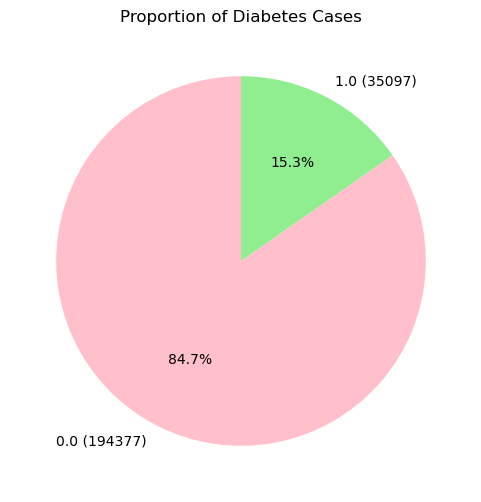

In [31]:
# Get value counts
counts = data["Diabetes_binary"].value_counts()

# Define labels with counts
labels = [f"{idx} ({val})" for idx, val in counts.items()]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=["pink", "lightgreen"], startangle=90)
plt.title("Proportion of Diabetes Cases")
plt.ylabel("")  # Hide y-label
plt.show()

***Column charts to determine number of respondants across different features.***

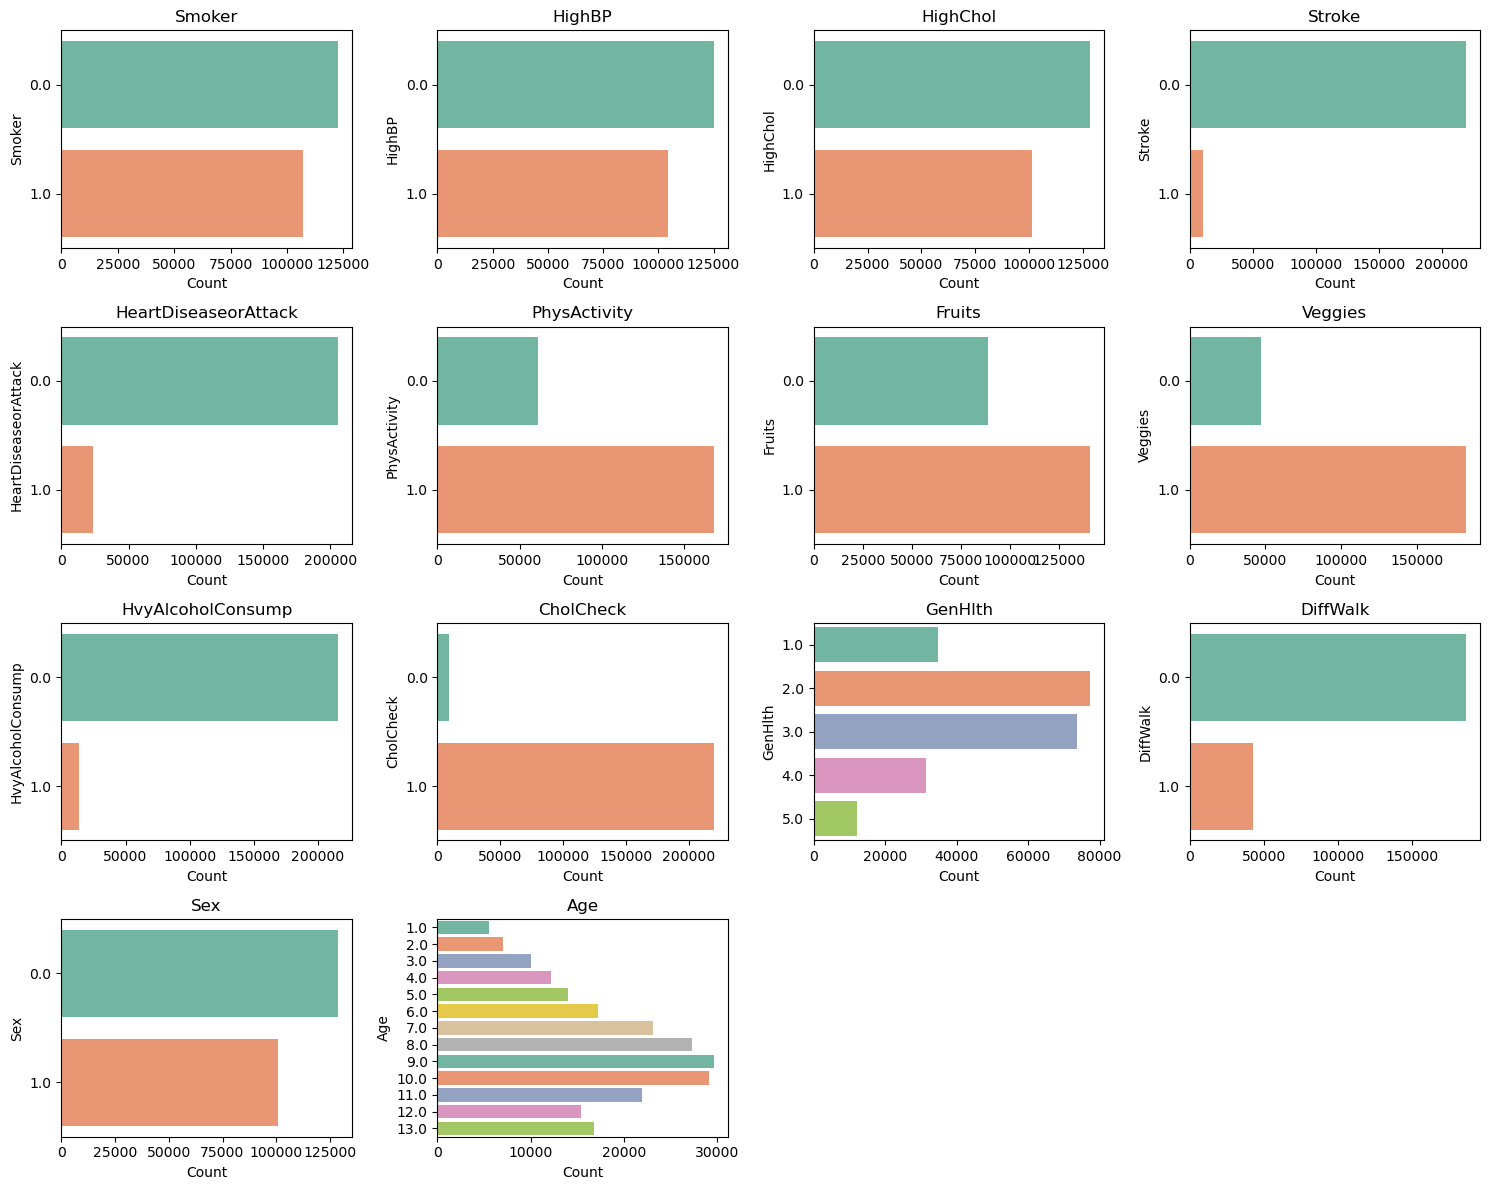

In [33]:
categorical_vars = ["Smoker", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack",
                    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "CholCheck",
                    "GenHlth", "DiffWalk", "Sex", "Age"]

# Dynamically determine number of rows and columns for subplots
num_vars = len(categorical_vars)
num_cols = 4  # Set fixed number of columns
num_rows = math.ceil(num_vars / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()  # Flatten for easy indexing

# Generate count plots
for i, var in enumerate(categorical_vars):
    sns.countplot(y=var, data=data, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(var)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplot spaces

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

***Histogram to visualize distribution across all features.***

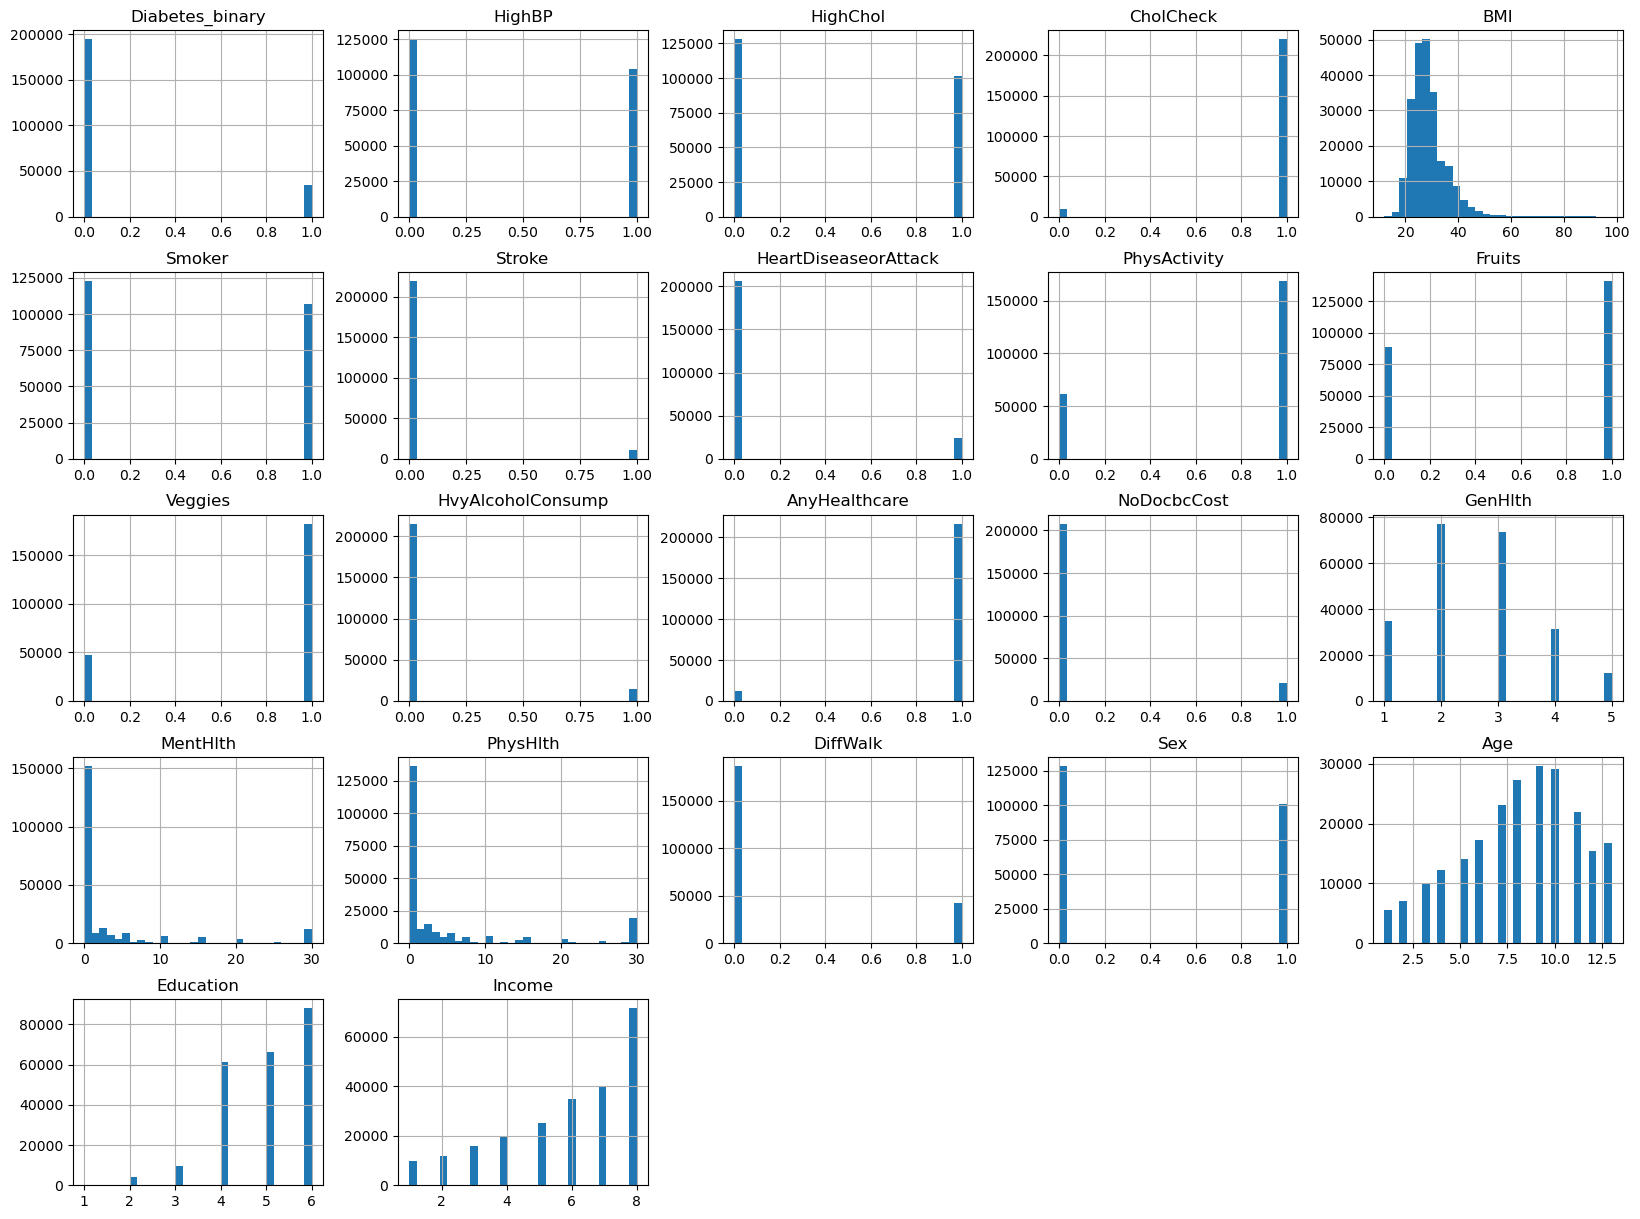

In [35]:
data.hist(figsize=(20, 15), bins=30)
plt.show()

***Boxplot to check outliers in each feature.***

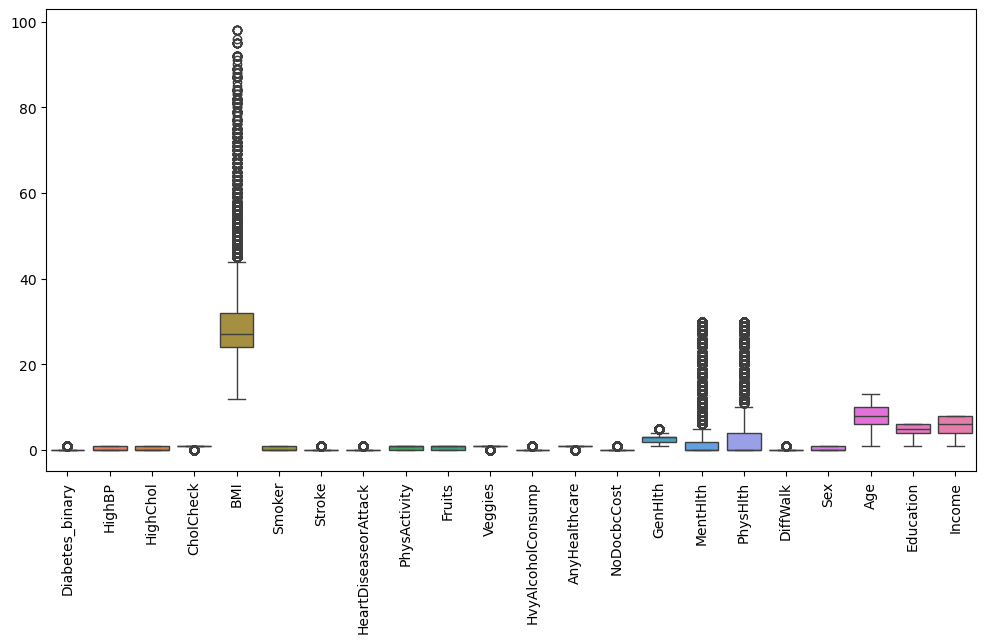

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

**Bivariate Analysis**

***Correlation Heatmap***

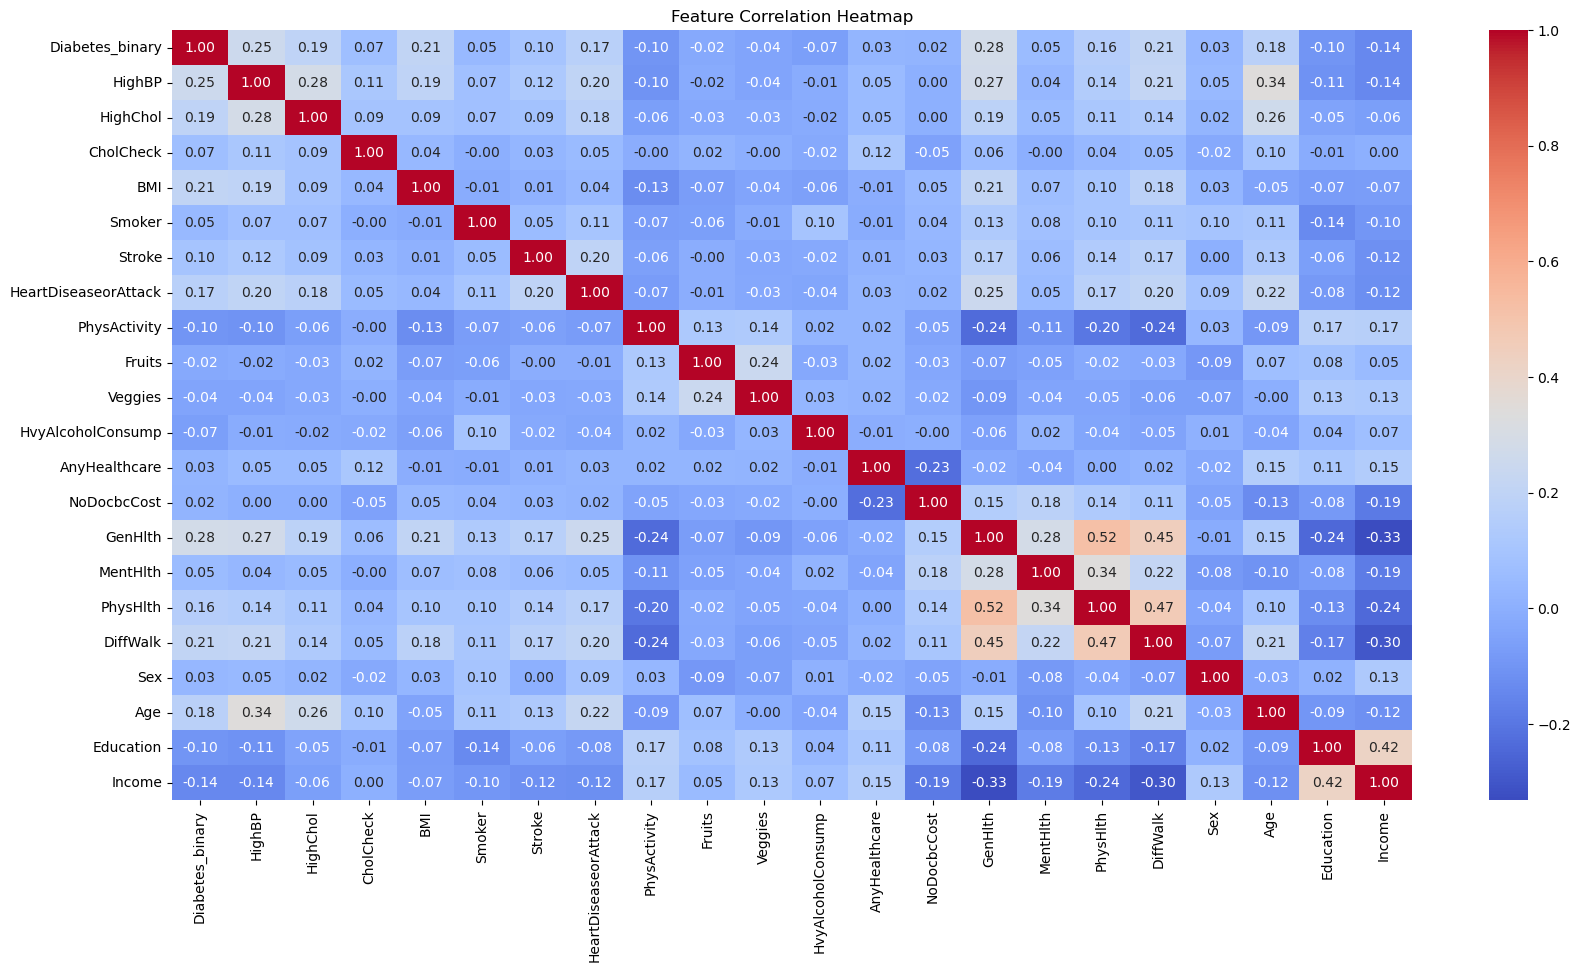

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

***Visualization to analyze smoking habits amongst diabetic and non-diabetec/prediabetic respondants.***

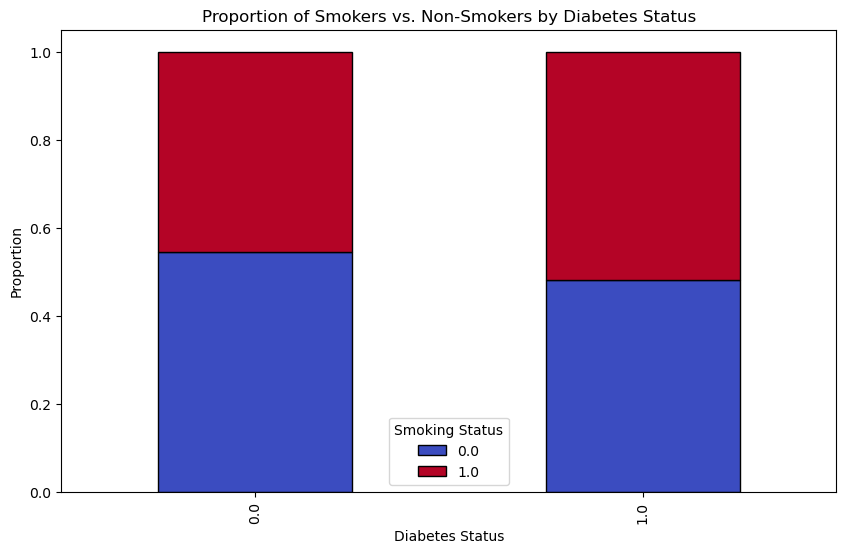

In [44]:
cross_tab = pd.crosstab(data["Diabetes_binary"], data["Smoker"], normalize="index")

cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Proportion of Smokers vs. Non-Smokers by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Proportion")
plt.legend(title="Smoking Status")
plt.show()

***Histogram visualization to breakdown of diabetic and non-diabetic/prediabetic respondants according to BMI ranges.***

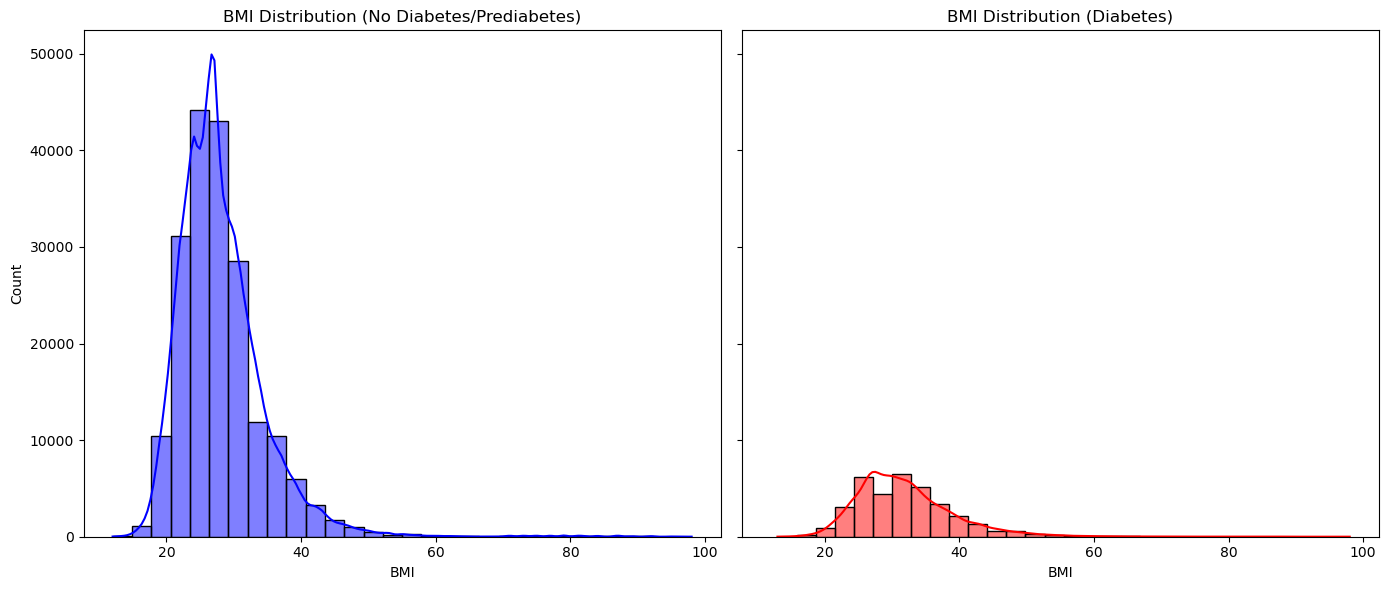

In [47]:
# Split data into two subsets
data_0 = data[data["Diabetes_binary"] == 0.0]
data_1 = data[data["Diabetes_binary"] == 1.0]

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharex=True, sharey=True)

# Histogram for Diabetes_binary = 0.0
sns.histplot(data_0["BMI"], bins=30, kde=True, color="blue", ax=axes[0])
axes[0].set_title("BMI Distribution (No Diabetes/Prediabetes)")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Count")

# Histogram for Diabetes_binary = 1.0
sns.histplot(data_1["BMI"], bins=30, kde=True, color="red", ax=axes[1])
axes[1].set_title("BMI Distribution (Diabetes)")
axes[1].set_xlabel("BMI")

# Adjust layout
plt.tight_layout()
plt.show()

## Outlier Detection

In [26]:
num_cols = data.select_dtypes(include=['number']).columns.tolist()

# Compute skewness & kurtosis
skewness = data[num_cols].skew()
kurtosis = data[num_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness": skewness, "Kurtosis": kurtosis})

# Reset index and sort by Skewness in descending order
normality_stats_sorted = normality_stats.reset_index().rename(columns={"index": "Feature"})
normality_stats_sorted = normality_stats_sorted.sort_values(by="Skewness", ascending=False)

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))

,Feature,Skewness,Kurtosis
6,Stroke,4.4001,17.3610
11,HvyAlcoholConsump,3.6762,11.5148
13,NoDocbcCost,2.8043,5.8644
7,HeartDiseaseorAttack,2.6062,4.7925
15,MentHlth,2.5445,5.4355
4,BMI,2.0635,10.4668
16,PhysHlth,2.0441,2.7616
0,Diabetes_binary,1.9284,1.7189
17,DiffWalk,1.6161,0.6117
14,GenHlth,0.3512,-0.4200


In [28]:
from scipy import stats

num_cols = data.select_dtypes(include=['number']).columns

z_scores = stats.zscore(data.select_dtypes(include=['number']))
outliers = (z_scores > 3) | (z_scores < -3)
data_removed = data[(~outliers).all(axis=1)]

print("Shape before removing outliers:", data.shape)
print("Shape after removing outliers:", data_removed.shape)

Shape before removing outliers: (229474, 22)
Shape after removing outliers: (162058, 22)


In [30]:
# Compute skewness & kurtosis after Z-Score
skewness = data_removed[num_cols].skew()
kurtosis = data_removed[num_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness after Z-Score": skewness, "Kurtosis after Z-Score": kurtosis})

# Sort by Skewness in descending order
normality_stats_sorted = normality_stats.sort_values(by="Skewness after Z-Score", ascending=False)

# Display as a styled table
import pandas as pd
from IPython.display import display

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))

,Skewness after Z-Score,Kurtosis after Z-Score
MentHlth,3.1720,10.5370
HeartDiseaseorAttack,2.8086,5.8883
PhysHlth,2.4906,5.0704
Diabetes_binary,1.9768,1.9079
DiffWalk,1.9440,1.7792
BMI,0.7756,0.6568
GenHlth,0.3704,-0.2569
Smoker,0.2558,-1.9346
HighChol,0.2258,-1.9490
Sex,0.2208,-1.9513


## Feature Selection

I will be using k-Means Clustering method to determine optimum k-value and determine the important features.

In [32]:
data_removed

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [34]:
# Select numeric columns
num_cols = data_removed.select_dtypes(include=['number']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_removed[num_cols])

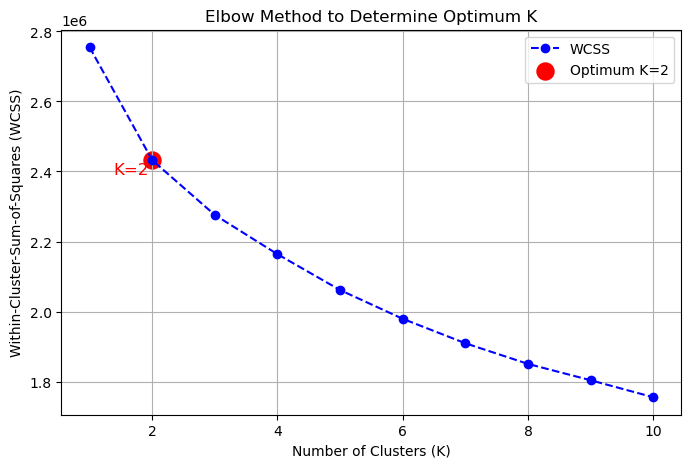

In [36]:
# Find the optimum K using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
k_values = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Store WCSS for each K

# Determined the "elbow" point (Replace with your optimal K)
optimal_k = 2

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b', label="WCSS")

# Highlight the optimum K value
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', s=150, marker='o', label=f"Optimum K={optimal_k}")
plt.annotate(f"K={optimal_k}", (optimal_k, wcss[optimal_k - 1]), 
             textcoords="offset points", xytext=(-15, -10), ha='center', fontsize=12, color='red')

# Labels and Title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow Method to Determine Optimum K")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [42]:
# Apply K-Means clustering (choosing k=2 based on the previous visualization)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Compute feature importance using cluster centers
feature_importance = np.std(kmeans.cluster_centers_, axis=0)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': num_cols, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display most important features
print("Feature Importance based on K-Means Clustering:")
print(feature_importance_df)

# Select top N features
top_features = feature_importance_df['Feature'].head(6).values
selected_data = data_removed[top_features]

print("Selected Features:", top_features)

Feature Importance based on K-Means Clustering:
                 Feature  Importance
14               GenHlth    0.613693
17              DiffWalk    0.594938
16              PhysHlth    0.467526
0        Diabetes_binary    0.460227
21                Income    0.453904
1                 HighBP    0.452739
19                   Age    0.383663
7   HeartDiseaseorAttack    0.371433
20             Education    0.348174
8           PhysActivity    0.337752
2               HighChol    0.300986
4                    BMI    0.261312
5                 Smoker    0.198411
10               Veggies    0.138217
15              MentHlth    0.137644
9                 Fruits    0.073778
18                   Sex    0.031371
13           NoDocbcCost    0.000000
3              CholCheck    0.000000
6                 Stroke    0.000000
12         AnyHealthcare    0.000000
11     HvyAlcoholConsump    0.000000
Selected Features: ['GenHlth' 'DiffWalk' 'PhysHlth' 'Diabetes_binary' 'Income' 'HighBP']


***After performing K-Means Clustering, the selected features were 'GenHlth', 'DiffWalk', 'PhysHlth', 'Diabetes_binary', and 'Income'. In my second phase, I will be considering the newly improved dataset for splitting and model initialization.***

## Splitting the Dataset

In [44]:
# Define Features (X) and Target Variable (y)
X = data_removed[['GenHlth', 'DiffWalk', 'PhysHlth', 'Income', 'HighBP']]  # Selected Features
y = data_removed['Diabetes_binary']  # Target variable

# Perform Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the Shape of Split Data
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (129646, 5)
Testing Set Shape: (32412, 5)


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
Diabetes_binary
0.0    110392
1.0     19254
Name: count, dtype: int64

Test set class distribution:
Diabetes_binary
0.0    27598
1.0     4814
Name: count, dtype: int64


In [50]:
print("Training set class distribution (percentage):")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution (percentage):")
print(y_test.value_counts(normalize=True) * 100)

Training set class distribution (percentage):
Diabetes_binary
0.0    85.14879
1.0    14.85121
Name: proportion, dtype: float64

Test set class distribution (percentage):
Diabetes_binary
0.0    85.147476
1.0    14.852524
Name: proportion, dtype: float64


***Since the dataset is imbalanced, I'll use NearMiss method to remedy it.***

In [52]:
nm = NearMiss(version=1)  # You can try version=2 or 3 as well
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Class distribution after NearMiss: {Counter(y_train_resampled)}")

Class distribution after NearMiss: Counter({0.0: 19254, 1.0: 19254})


## Model Initialization & Evaluation

In [54]:
# Dictionary to store classifiers and their names
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel='linear', random_state=42),
    "k-Nearest Neighbors (k-NN)": KNeighborsClassifier(n_neighbors=5),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Loop through each classifier, train it, and evaluate it
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Evaluate performance
    print(f"\n=== {name} ===")
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("Classification Report:\n", classification_report(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 70.56%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.71      0.80     27598
         1.0       0.29      0.67      0.40      4814

    accuracy                           0.71     32412
   macro avg       0.61      0.69      0.60     32412
weighted avg       0.83      0.71      0.74     32412


=== Decision Tree ===
Accuracy: 65.63%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.65      0.76     27598
         1.0       0.25      0.68      0.37      4814

    accuracy                           0.66     32412
   macro avg       0.59      0.67      0.57     32412
weighted avg       0.82      0.66      0.71     32412


=== Random Forest ===
Accuracy: 65.25%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.65      0.76     27598
         1.0       0.25      0.69      

The Evaluation Metrics depicts satisfactory performances from all models. With an impressive accuracy of 80.16% and high precision and recall values, I choose the k-Nearest Neighbors' model as the top pick.

As part of my trial and error methods to determine the best course of action, I had performed outlier detection using IQR and Z-Score method. I further performed Log and Sqrt transformations to improve Skewness and Kurtosis. However, after performing model initialization and evaluation, the final output was conflicting. For instance, although k-Nearest Neighbor model had 83.57% accuracy, it's recall value for minority class (1.0) was only 0.0868. Similarly, all other models struggled with precision and recall, meaning they fail to correctly predict positive class (1.0). Hence, I decided to opt for Z-Score method for outlier detection because the model evaluation metrices gave satisfactory values.

For data imbalance, I had performed SMOTE analysis and NearMiss method separately. Based on model evaluation, NearMiss method proved competent.
    
In my third phase, I intend to do Hyperparameter Tuning to improve performances of each model to determine if current evaluation metrics will show improvement. Following this, I will build a pipeline for the best model and save it.

## Hyperparameter Tuning

In [59]:
# Define parameter grids for each classification model
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize models
models = {
    "Logistic Regression": (LogisticRegression(random_state=42), param_grid_lr),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), param_grid_dt),
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "Support Vector Machine (SVM)": (SVC(random_state=42), param_grid_svm),
    "k-Nearest Neighbors (k-NN)": (KNeighborsClassifier(), param_grid_knn),
    "MLP Classifier": (MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42), param_grid_mlp)
}

# Perform GridSearchCV and evaluate performance
best_estimators = {}
for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # Store the best estimator
    best_estimators[model_name] = best_model
    
    # Evaluate performance on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Performance after Hyperparameter Tuning:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Performing GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Logistic Regression Performance after Hyperparameter Tuning:
Accuracy: 70.53%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.80     27598
         1.0       0.29      0.67      0.40      4814

    accuracy                           0.71     32412
   macro avg       0.61      0.69      0.60     32412
weighted avg       0.83      0.71      0.74     32412

--------------------------------------------------
Performing GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Performance after Hyperparameter Tuning:
Accuracy: 65.68%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.65      0.76     27598
         1.0       0.26      0.69      0.38   

***It can be observed that after performing Hyperparameter tuning, none of the models exhibited improved readings across any metrices. This can be attributed to the underlying dataset imbalance and prevelance of skewness even after performing outlier detection. Once again, **k-Nearest Neighbor** model outperformed with the highest accuracy amongst all the models and displayed consistent recall and precision values.***

***Hence I will proceed to build a pipeline using k-Nearest Neighbor model and perform verification analysis.***

## Pipeline Building

In [63]:
# Creating a pipeline with scaling, NearMiss, and best model
knn_pipeline = ImbPipeline([
    ('NearMiss', nm),
    ('model', KNeighborsClassifier(n_neighbors=5
    ))
])

knn_pipeline.fit(X_train, y_train)
y_pred_pipeline = knn_pipeline.predict(X_test)

print(f"k-NN Pipeline Model Accuracy: {accuracy_score(y_test, y_pred_pipeline) * 100:.2f}%")

k-NN Pipeline Model Accuracy: 80.16%


In [65]:
# Save the trained pipeline
joblib.dump(knn_pipeline, "k-NN Classifier.joblib")

['k-NN Classifier.joblib']

## Testing Unseen Data

In [319]:
# Loading unseen data
unseen_data = data.sample(n=120000, random_state=42)
unseen_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
218137,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,10.0,0.0,0.0,10.0,6.0,8.0
234092,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
220499,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,4.0,4.0
133305,0.0,1.0,1.0,1.0,24.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,16.0,1.0,0.0,10.0,3.0,1.0
1394,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73532,0.0,1.0,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,5.0,15.0,0.0,0.0,1.0,8.0,5.0,5.0
40381,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,12.0,5.0,4.0
21367,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,5.0,7.0
150056,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,4.0,0.0,0.0,13.0,6.0,5.0


In [321]:
print("\t")
print(f"The shape of the dataset before removing the duplicates is {unseen_data.shape}")

	
The shape of the dataset before removing the duplicates is (120000, 22)


In [323]:
# Remove duplicates
data = data.drop_duplicates()

In [325]:
print("\t")
print(f"The shape of the dataset after removing the duplicates is {unseen_data.shape}")

	
The shape of the dataset after removing the duplicates is (120000, 22)


In [327]:
# Select numeric columns
num_cols = unseen_data.select_dtypes(include=['number']).columns

# Standardize the data
scaler = StandardScaler()
scaled_unseen_data = scaler.fit_transform(unseen_data[num_cols])

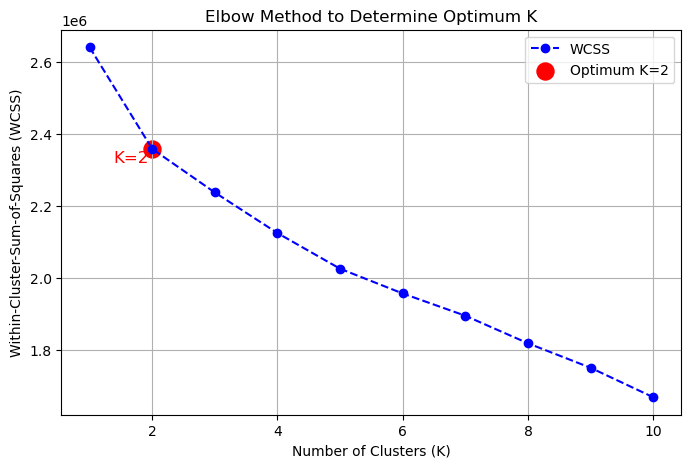

In [329]:
# Find the optimum K using the Elbow Method
wcss_unseen = []  # Within-Cluster-Sum-of-Squares
k_values_unseen = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans_unseen = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_unseen.fit(scaled_unseen_data)
    wcss_unseen.append(kmeans_unseen.inertia_)  # Store WCSS for each K

# Determined the "elbow" point (Replace with your optimal K)
optimal_k = 2

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values_unseen, wcss_unseen, marker='o', linestyle='--', color='b', label="WCSS")

# Highlight the optimum K value
plt.scatter(optimal_k, wcss_unseen[optimal_k - 1], color='red', s=150, marker='o', label=f"Optimum K={optimal_k}")
plt.annotate(f"K={optimal_k}", (optimal_k, wcss_unseen[optimal_k - 1]), 
             textcoords="offset points", xytext=(-15, -10), ha='center', fontsize=12, color='red')

# Labels and Title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow Method to Determine Optimum K")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [331]:
# Apply K-Means clustering (choosing k=2 based on the previous visualization)
kmeans_unseen = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_unseen.fit(scaled_unseen_data)

# Compute feature importance using cluster centers
feature_importance_unseen = np.std(kmeans_unseen.cluster_centers_, axis=0)

# Create a DataFrame to display feature importance
feature_importance_unseen_df = pd.DataFrame({'Feature': num_cols, 'Importance': feature_importance_unseen})
feature_importance_unseen_df = feature_importance_unseen_df.sort_values(by='Importance', ascending=False)

# Display most important features
print("Feature Importance based on K-Means Clustering:")
print(feature_importance_unseen_df)

# Select top N features (e.g., top 5)
top_features_unseen = feature_importance_unseen_df['Feature'].head(5).values
selected_unseen_data = unseen_data[top_features_unseen]

print("Selected Features in Unseen Data:", top_features_unseen)

Feature Importance based on K-Means Clustering:
                 Feature  Importance
17              DiffWalk    0.725523
14               GenHlth    0.682847
16              PhysHlth    0.624141
21                Income    0.502432
0        Diabetes_binary    0.430945
1                 HighBP    0.404789
7   HeartDiseaseorAttack    0.393199
20             Education    0.366481
8           PhysActivity    0.364434
15              MentHlth    0.340963
2               HighChol    0.295928
19                   Age    0.290523
6                 Stroke    0.281902
4                    BMI    0.253594
5                 Smoker    0.190752
13           NoDocbcCost    0.189066
10               Veggies    0.159376
9                 Fruits    0.095606
11     HvyAlcoholConsump    0.083173
3              CholCheck    0.078410
18                   Sex    0.059762
12         AnyHealthcare    0.023569
Selected Features in Unseen Data: ['DiffWalk' 'GenHlth' 'PhysHlth' 'Income' 'Diabetes_binary']


In [333]:
# Define Features (X) and Target Variable (y)
X_unseen = unseen_data[['GenHlth', 'DiffWalk', 'PhysHlth', 'Income','HighBP']]  # Selected Features
y_unseen = unseen_data['Diabetes_binary']  # Target variable

# Perform Train-Test Split (80% Train, 20% Test)
X_unseen_train, X_unseen_test, y_unseen_train, y_unseen_test = train_test_split(X_unseen, y_unseen, test_size=0.2, stratify=y_unseen, random_state=42)

# Display the Shape of Split Data
print("Training Set Shape:", X_unseen_train.shape)
print("Testing Set Shape:", X_unseen_test.shape)

Training Set Shape: (96000, 5)
Testing Set Shape: (24000, 5)


In [335]:
print("Training set class distribution (percentage):")
print(y_unseen_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution (percentage):")
print(y_unseen_test.value_counts(normalize=True) * 100)

Training set class distribution (percentage):
Diabetes_binary
0.0    84.53125
1.0    15.46875
Name: proportion, dtype: float64

Test set class distribution (percentage):
Diabetes_binary
0.0    84.529167
1.0    15.470833
Name: proportion, dtype: float64


In [337]:
nm = NearMiss(version=1)  # You can try version=2 or 3 as well
X_unseen_train_resampled, y_unseen_train_resampled = nm.fit_resample(X_unseen_train, y_unseen_train)

# Check the new class distribution
print(f"Class distribution after NearMiss: {Counter(y_unseen_train_resampled)}")

Class distribution after NearMiss: Counter({0.0: 14850, 1.0: 14850})


In [339]:
knn_pipeline.fit(X_unseen_train, y_unseen_train)
y_pred_unseen_knn_pipeline = knn_pipeline.predict(X_unseen_test)

print(f"k-NN Pipeline Model Accuracy: {accuracy_score(y_unseen_test, y_pred_unseen_knn_pipeline) * 100:.2f}%")

k-NN Pipeline Model Accuracy: 78.97%


In [341]:
# Load the best model from a file
model_filename = 'k-NN Classifier.joblib'
loaded_model = joblib.load(model_filename)

In [343]:
# Make predictions on unseen data
predictions = loaded_model.predict(X_unseen)

In [344]:
# Output predictions
print("Predictions on Unseen Data:", predictions[:50])

Predictions on Unseen Data: [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


***In order to test the k-Nearest Neighbor model pipeline, I randomly selected 120000 instances from the dataset as unseen data and performed all the steps I had performed earlier and submitted it to the pipeline. The pipeline showed an accuracy of 78.97% and made predictions. We can conclude that the pipeline's performance is robust and competent, and it can used to ascertain predictions from similar datasets with high accuracy and near-precise predictions.***  

### Limitations

1. **The original dataset is severely imbalanced and several columns are highly skewed. Inspite of employing appropriate remedial measures, no meaningful improvements could be achieved.**
2. **The target column relies on sevaral factors such as demographics, health conditions, lifestyle choices, and healthcare access. These factors are key influencers in determining illness detection. However, these factors have to be presented in a non-binary structure to have a comprehensive understanding of each factor's role in determining the illness' presence.**
3. **The diabetic participants in this study is extremely low compared to non-diabetic participants. Given how prevelant diabetes is in the USA, this dataset cannot be heavily relied to infer trends and patterns or to deduce meaningful information.**

### Future Improvements

1. **Feature Engineering**: Exploring PCA or advanced feature selection techniques
2. **Handling Imbalance**: Using SMOTE instead of undersampling for better generalization
3. **Deep Learning Models**: Testing Convolutional or Recurrent Neural Networks
4. **Real-time Deployment**: Integrating the model with a Power BI dashboard for public health analysis
5. **Dataset Expansion**: Updating this dataset with more participants to improve balance and make more accurate predictions